In [6]:
#standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
heart_disease=pd.read_csv("13.1 heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#all columns
x = heart_disease.drop('target',axis=1)
#target column only
y = heart_disease['target']
x,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [9]:
#split data into training and test sets
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
#view the data shapes
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [11]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [12]:
clf.fit(x_train,y_train);

In [13]:
y_preds=clf.predict(x_test)

In [14]:
y_preds

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [15]:
y_train

40     1
101    1
105    1
33     1
16     1
      ..
288    0
179    0
106    1
139    1
39     1
Name: target, Length: 242, dtype: int64

In [16]:
clf.score(x_train,y_train)

1.0

In [17]:
clf.score(x_test,y_test)

0.8360655737704918

x_test.loc[206]

heart_disease.loc[206]

In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
#make a prediction on a single sample(has to be array)
#clf.predict(np.array(x_test.loc[206]).reshape(1,-1))

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.77      0.84        35
           1       0.75      0.92      0.83        26

    accuracy                           0.84        61
   macro avg       0.84      0.85      0.84        61
weighted avg       0.85      0.84      0.84        61



In [21]:
confusion_matrix(y_test,y_preds)

array([[27,  8],
       [ 2, 24]], dtype=int64)

In [22]:
accuracy_score(y_test,y_preds)

0.8360655737704918

# EXPERIMENT TO improve (hyperparameter tuning)

In [23]:
#try diff numb of estimators() n_estimators is a hyperparameter
np.random.seed(42)
for i in range(10,100,10):
    print(f'trying model with {i} estimators...')
    clf=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f'model accuracy on test set: {clf.score(x_test,y_test)*100:.2F}%')
print('')

trying model with 10 estimators...
model accuracy on test set: 85.25%
trying model with 20 estimators...
model accuracy on test set: 83.61%
trying model with 30 estimators...
model accuracy on test set: 83.61%
trying model with 40 estimators...
model accuracy on test set: 78.69%
trying model with 50 estimators...
model accuracy on test set: 83.61%
trying model with 60 estimators...
model accuracy on test set: 80.33%
trying model with 70 estimators...
model accuracy on test set: 80.33%
trying model with 80 estimators...
model accuracy on test set: 81.97%
trying model with 90 estimators...
model accuracy on test set: 81.97%



In [24]:
#save a model and load it
import pickle
pickle.dump(clf,open('random_forest_model_1.pkl','wb'))

In [25]:
loaded_model = pickle.load(open("random_forest_model_1.pkl",'rb'))
loaded_model.score(x_test,y_test)

0.819672131147541

In [26]:
import sklearn
sklearn.show_versions()


System:
    python: 3.10.6 | packaged by conda-forge | (main, Oct 24 2022, 16:02:16) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\siliv\OneDrive\Desktop\sample_project_1\env\python.exe
   machine: Windows-10-10.0.22621-SP0

Python dependencies:
          pip: 22.2.2
   setuptools: 65.5.0
      sklearn: 1.0.2
        numpy: 1.23.3
        scipy: 1.9.3
       Cython: None
       pandas: 1.4.4
   matplotlib: 3.5.2
       joblib: 1.1.1
threadpoolctl: 2.2.0

Built with OpenMP: True


## getting data ready-> splitting data

In [27]:
#split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,
                                                y,
                                                test_size=0.2)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [29]:
x.shape

(303, 13)

In [30]:
len(heart_disease)

303

In [31]:
x.shape[0]*0.8

242.4

In [32]:
242+61

303

letter-->numerical

In [33]:
car_sales=pd.read_csv('car-sales-extended.csv')

In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [36]:
car_sales['Doors'].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [37]:
len(car_sales)

1000

In [38]:
#split into x,y
x=car_sales.drop('Price',axis=1)
y=car_sales['Price']
#split into training and test
x_train,x_test,y_train,y_test=train_test_split(x,
                                              y,
                                              test_size=0.2)

In [39]:
y

0      15323
1      19943
2      28343
3      13434
4      14043
       ...  
995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, Length: 1000, dtype: int64

In [1]:
#build machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

NameError: name 'x_train' is not defined

In [46]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [47]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [48]:
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [49]:
#lets refit the model
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,
                                                y,
                                                test_size=0.2)

model.fit(x_train,y_train);

In [50]:
model.score(x_test,y_test)

0.3235867221569877

## what if there were missing values
1. fill with some values(known as imputation)
2. remove the samples with missing data altogether.

In [51]:
#import missing data
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [52]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [53]:
car_sales_missing.head(15)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [54]:
len(car_sales_missing)

1000

In [55]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,
                                                y,
                                                test_size=0.2)

model.fit(x_train,y_train);

In [56]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

In [57]:
dummies=pd.get_dummies(car_sales_missing[['Make','Colour','Doors']])
dummies.head(15)

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4.0,0,1,0,0,0,0,0,0,1
1,5.0,1,0,0,0,0,1,0,0,0
2,4.0,0,1,0,0,0,0,0,0,1
3,4.0,0,0,0,1,0,0,0,0,1
4,3.0,0,0,1,0,0,1,0,0,0
5,4.0,0,1,0,0,0,0,0,1,0
6,4.0,0,0,0,1,0,1,0,0,0
7,4.0,0,1,0,0,0,0,0,0,1
8,4.0,0,0,0,0,0,0,0,0,1
9,4.0,0,1,0,0,0,1,0,0,0


In [58]:
car_sales_missing.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

## option1: Fill missing data with Pandas

In [59]:
car_sales_missing['Odometer (KM)'].mean()

131253.23789473684

In [60]:
#fill the make column
car_sales_missing['Make'].fillna('missing',inplace=True)

#fill the colour column
car_sales_missing['Colour'].fillna('missing',inplace=True)

#fill the odometer column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)

#fill the doors columns
car_sales_missing['Doors'].fillna(4,inplace=True)

In [61]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [62]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [63]:
# remove row with missing price value
car_sales_missing.dropna(inplace=True)

In [64]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [65]:
len(car_sales_missing)

950

In [66]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [67]:
x = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [68]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                 categorical_features)],
                               remainder='passthrough')
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [69]:
dummies=pd.get_dummies(car_sales_missing[['Make','Colour','Doors']])
dummies.head(15)

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Make_missing,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Colour_missing
0,4.0,0,1,0,0,0,0,0,0,0,1,0
1,5.0,1,0,0,0,0,0,1,0,0,0,0
2,4.0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,0,0,0,1,0,0,0,0,0,1,0
4,3.0,0,0,1,0,0,0,1,0,0,0,0
5,4.0,0,1,0,0,0,0,0,0,1,0,0
6,4.0,0,0,0,1,0,0,1,0,0,0,0
7,4.0,0,1,0,0,0,0,0,0,0,1,0
8,4.0,0,0,0,0,1,0,0,0,0,1,0
9,4.0,0,1,0,0,0,0,1,0,0,0,0


In [70]:
np.random.seed(42)
x_train,x_test,y_train,y_test = train_test_split(transformed_x,
                                                y,
                                                test_size=0.2)

model.fit(x_train,y_train);

In [71]:
model.score(x_test,y_test)

0.9998421058539825

# Option2: Fill missing values with scikit-learn

In [72]:
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [73]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [74]:
#drop the rows with no values
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [75]:
#split x&y
x=car_sales_missing.drop('Price', axis=1)
y=car_sales_missing['Price']

In [76]:
#filling missing values using sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#fill categorical values with missing and numerical values with mean
cat_imputer=SimpleImputer(strategy='constant', fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')

#define columns
cat_features=['Make','Colour']
door_features=['Doors']
num_features=['Odometer (KM)']
#create a imputer 
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer',door_imputer,door_features),
    ('num_imputer',num_imputer,num_features)])

#tranform the data
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [77]:
car_sales_filled=pd.DataFrame(filled_x,columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [78]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [79]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer=ColumnTransformer([('one_hot',
                              one_hot,
                              categorical_features)],
                             remainder='passthrough')
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [80]:
#now we got our dta as numbers and filled
#lets fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(transformed_x,
                                                y,
                                                test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.21990196728583944

 ## 2. Choosing the right estimator/algorithm for our problem
 scikit learn uses estimator as another term for machine learning model or algorithm
 
 *Classification - predicting whether a sample is one thing
 
 *Regression-predicting a number

## 2.1 picking a machine learning model for regression problem

In [81]:
#import boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [82]:
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [83]:
#how many samples?
len(boston_df)

506

In [84]:
#lets try ridge regressin model
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

#create the data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

#split into train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate ridge model
model=Ridge()
model.fit(x_train,y_train)

#check the score
model.score(x_test,y_test)

0.6662221670168524

How do we improve the score?

what if ridge not working?

In [85]:
#lets try random forest regressor model
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create the data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

#split into train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate model
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

#check the score
rfr.score(x_test,y_test)

0.8654448653350507

In [86]:
#checking the ridge model again
model.score(x_test,y_test)

0.6662221670168524

## 2.2 Choosing an estimator for a classification problem

lets go to https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [87]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [88]:
len(heart_disease)

303

#### 303<100k map says to implement linear SVC

In [89]:
#import linear SVC
from sklearn.svm import LinearSVC

#setup rnadom seed
np.random.seed(42)

#make the data
x = heart_disease.drop("target",axis=1)
y = heart_disease['target']

#split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

#instantiate linear SVC
svc = LinearSVC(max_iter=1000)
svc.fit(x_train,y_train)

#evaluate linear svc
svc.score(x_test,y_test)

0.8688524590163934

In [90]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [91]:
#lets try random forest regressor model
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#split into train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate model
rfh = RandomForestRegressor()
rfh.fit(x_train,y_train)

#check the score
rfh.score(x_test,y_test)

0.5106393318965518

# 3.Fit the model/algorithm on our data and use it to make prediction


## 3.1 fitting model to data
* X = features,feature variables,data
* Y = labels targets, target variables

In [92]:
#lets try random forest Classifier model
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#split into train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate model
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#check the score
clf.score(x_test,y_test)

0.8524590163934426

## 3.2 Make predictions using a machine learning model

#### 2 ways to make predictions
 1.predict()
 
 2.predict_prob()

In [93]:
# use a trained model to make prediction
clf.predict(np.array([1,7,8,3,4]))#this will not work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [94]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [95]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [96]:
y_test.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [97]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [98]:
#compare predictions to truth labels to evaluate model
y_preds = clf.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [99]:
clf.score(x_test,y_test)

0.8524590163934426

In [100]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [101]:
#make predictions with predict proba
clf.predict_proba(x_test)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [102]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [103]:
#lets try random forest regressor model
from sklearn.ensemble import RandomForestRegressor

#setup random seed
np.random.seed(42)

#create the data
x=boston_df.drop('target',axis=1)
y=boston_df['target']

#split into train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate model
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

#check the score
rfr.score(x_test,y_test)

0.8654448653350507

In [104]:
y_preds = rfr.predict(x_test)
y_preds

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639, 19.787, 19.541,  8.583, 21.85 , 19.531, 25.851,
       19.759,  8.22 , 45.109, 14.712, 24.548, 23.956, 14.548, 22.944,
       15.023, 14.643, 21.137, 14.153, 19.232, 20.666, 19.588, 23.254,
       33.01 , 20.461, 14.271, 15.889, 34.704, 19.154, 20.85 , 24.395,
       18.978, 29.84 , 45.302, 19.447, 22.234, 13.751, 15.511, 24.612,
       18.729, 28.235, 21.21 , 34.218, 17.271, 26.147, 45.279, 21.924,
       15.532, 32.412, 22.212, 20.453, 25.532, 34.326, 28.795, 18.951,
       27.145, 17.181, 13.534, 23.04 , 28.714, 15.802, 20.451, 27.87 ,
       10.193, 21.507, 22.383,  7.265, 20.089, 45.388, 10.88 , 13.053,
       21.322, 12.366, 20.233,  9.135, 20.052, 26.787, 15.277, 23.267,
       23.613, 17.699, 21.617,  7.921, 19.475, 18.807, 22.386, 19.836,
       38.714, 13.159, 12.476, 13.612, 20.205, 23.832])

In [105]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: target, Length: 102, dtype: float64

In [106]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.136382352941176

### 4 Evaluating model using scoring parameter(cross validation)

In [107]:
 #lets try random forest Classifier model
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#split into train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate model
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#check the score
clf.score(x_test,y_test)

0.8524590163934426

In [108]:
from sklearn.model_selection import cross_val_score
xdef = cross_val_score(clf,x,y,cv = 5)
xnone = cross_val_score(clf,x,y,cv = 5,scoring = None)
#default scoring is set to mean accuracy 
xdef,xnone

(array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667]),
 array([0.83606557, 0.8852459 , 0.7704918 , 0.8       , 0.8       ]))

In [109]:
np.random.seed(42)
#single training and test split score
clf_single_score = clf.score(x_test,y_test)
#take the mean of 5 fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf,x,y,cv = 5))
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1classification model evaluation metrics
* Accuracy
* Area under ROC curve
* confusion matrix
* classification report

In [110]:
from sklearn.model_selection import cross_val_score
 #lets try random forest Classifier model
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

#create the data
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']

#split into train test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Instantiate model
clf = RandomForestClassifier()
clf.fit(x_train,y_train)
cross_val_score = cross_val_score(clf,x,y,cv = 5)
np.mean(cross_val_score)

0.811639344262295

In [111]:
print("Heart disease classifer cross validated accuracy:", [np.mean(cross_val_score)*100])

Heart disease classifer cross validated accuracy: [81.1639344262295]


#### Area under the receives operating character 
* Area under curve(AUC)
* ROC curve

In [112]:
from sklearn.metrics import roc_curve
#make predictions with probability
y_probs = clf.predict_proba(x_test)
y_probs[:10], len(y_probs)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]),
 61)

In [113]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [114]:
#calculate fpr(false positive rate) tpr(true positive rate) and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)
#check fpr
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

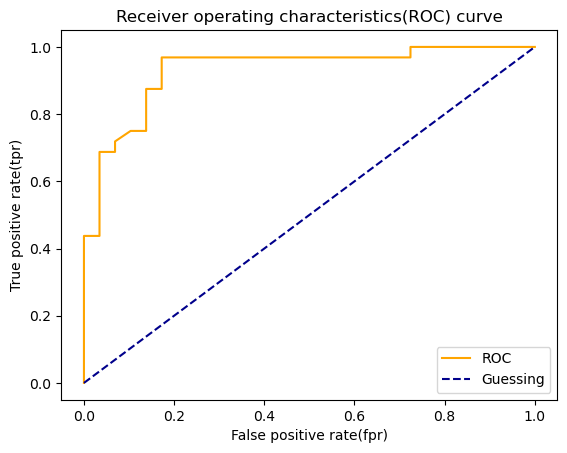

In [115]:
#create a function for ploting roc curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    #plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle='--', label='Guessing')
    
    #customize plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver operating characteristics(ROC) curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)


In [116]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.9304956896551724

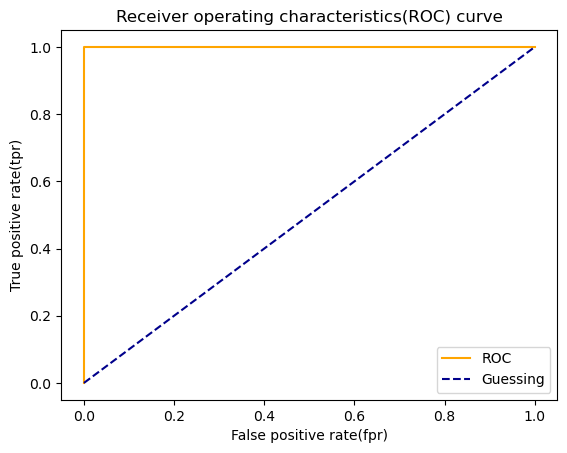

In [117]:
#plot perfect roc curve & auc score
fpr,tpr,thresholds = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [118]:
#perfect auc score
roc_auc_score(y_test,y_test)

1.0

# Confusion Matrix 
it is a matrix that is a quick way to compare the labels a model predicts and the actual label it was supposed to be

In [119]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(x_test)
confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 4, 28]], dtype=int64)

In [120]:
#visualize confusion matrix with pd.crosstable
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual labels'],
            colnames=['Predicted labels'])

Predicted labels,0,1
Actual labels,,
0,24,5
1,4,28


In [121]:
#installing seaborn
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




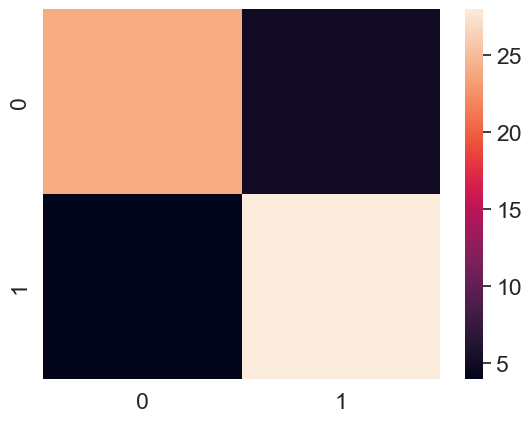

In [122]:
#make our confusion matrix more visible using seaborn
import seaborn as sns
#set the font scale
sns.set(font_scale = 1.5)
#create a confusioin matrix
conf_mat = confusion_matrix(y_test,y_preds)
#plot it using seaborn
sns.heatmap(conf_mat);

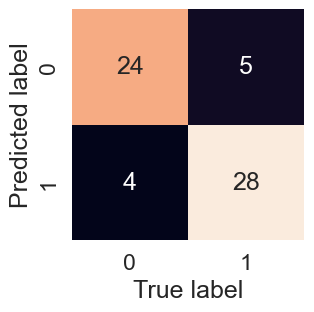

In [123]:
def plot_conf_mat(conf_mat):
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    """#fix the broken annotations
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom+0.5,top-0.5);"""
    
plot_conf_mat(conf_mat)

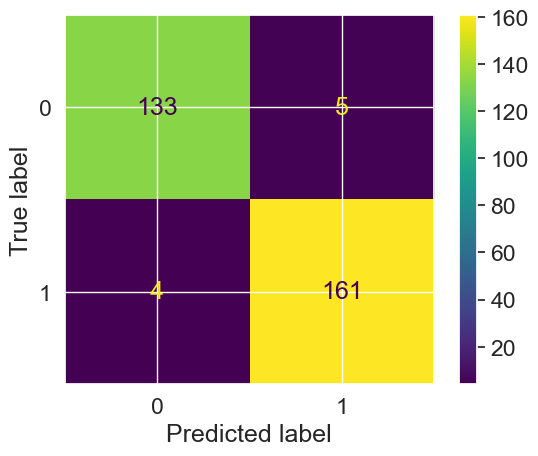

In [124]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x,y);

# classification report

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### To summarize classification metrics:
* Accuracy is a good measure to start with if all classes are balancxed(e.g. same amount of samples which are labelled with o or 1)
* Precision and recall become more important when classes are imbalanced.
* If false positive prediction are worse than false negatives, aim for higher precision.
* If false negayives are worse than false positives, aim for higher recall.
* F1-score is a combination of precison and recall

### 4.2.2 Regression model evaluation metrics
Model evaluationmetrics documentation - https://sckit-learn.org/stable/modules/model_evaluation.html

1.R^2(pronounced r-squared) or coefficient of determination)
1.Mean absolute error(MAE)
2.Mean squared error(MSE)

In [126]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x = boston_df.drop("target", axis = 1)
y = boston_df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8654448653350507

In [127]:
from sklearn.metrics import r2_score
#fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [128]:
y_test.mean()

21.488235294117654

In [129]:
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [130]:
r2_score(y_test,y_test_mean)

2.220446049250313e-16

In [131]:
r2_score(y_test,y_test)

1.0

 **Mean absolute error(MAE)**
 MAE is the avg of the abs diff btw pred and actual values.It gives u a idea of how wrong ur models predictions are

In [132]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.136382352941176

In [133]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})
df

,actual values,predicted values
173,23.6,23.081
274,32.4,30.574
491,13.6,16.759
72,22.8,23.460
452,16.1,16.893
...,...,...
412,17.9,13.159
436,9.6,12.476
411,17.2,13.612
86,22.5,20.205


In [134]:
df["differences"]=df["predicted values"]-df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


**Mean Squared error(MSE)**
* mean of square of diff

In [135]:
#mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test,y_preds)
mse

9.867437068627442

## 4.2.3 Finally using scoring parameter

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]
clf = RandomForestClassifier()

In [137]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [138]:
#cross validation accuracy
print(f'The cross validation accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross validation accuracy is: 82.48%


In [139]:
np.random.seed(42)
cv_acc = cross_val_score(clf,x,y,cv=5,scoring="accuracy")
print(f'the cross-validated accuracy is:{np.mean(cv_acc)*100:.2f}%')

the cross-validated accuracy is:82.48%


In [140]:
#Precision
cv_precision = cross_val_score(clf,x,y,cv=5,scoring="precision")
np.mean(cv_precision)

0.8085601538512754

In [141]:
#recall
cv_recall = cross_val_score(clf,x,y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [142]:
#f1
cv_f1 = cross_val_score(clf,x,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.841476533416832

How about our regression model?

In [143]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x= boston_df.drop("target",axis=1)
y=boston_df["target"]
model=RandomForestRegressor()

In [144]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring=None)
cv_r2,np.mean(cv_r2)

(array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379]),
 0.6243870737930857)

In [145]:
np.random.seed(42)
cv_r2 = cross_val_score(model,x,y,cv=5,scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [146]:
#mean absolute error
cv_mae = cross_val_score(model,x,y,cv=5,scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [147]:
cv_mse = cross_val_score(model,x,y,cv=5,scoring="neg_mean_squared_error")
cv_mse,np.mean(cv_mse)

(array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
        -19.48161818]),
 -21.12863512415064)

## 4.2.4 Evaluation using Metrics function

#### Regression model metrics

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

x_train,x_test,y_train,y_test = train_test_split(x,
                                                y,
                                                test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
y_preds=clf.predict(x_test)
print("classifier metrics on test set")
print(f"acc:{accuracy_score(y_test,y_preds)*100:2f}%")
print(f"precison:{precision_score(y_test,y_preds)*100:2f}%")
print(f"recall:{recall_score(y_test,y_preds)*100:2f}%")
print(f"f1:{f1_score(y_test,y_preds)*100:2f}%")

classifier metrics on test set
acc:85.245902%
precison:84.848485%
recall:87.500000%
f1:86.153846%


### Regression model metrics

In [149]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x=boston_df.drop('target',axis=1)
y=boston_df['target']

x_train,x_test,y_train,y_test = train_test_split(x,
                                                y,
                                                test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_preds=model.predict(x_test)
print("Regressor metrics on test set")
print(f"r2:{r2_score(y_test,y_preds)}")
print(f"MAE:{mean_absolute_error(y_test,y_preds)}")
print(f"MSE:{mean_squared_error(y_test,y_preds)}")

Regressor metrics on test set
r2:0.8654448653350507
MAE:2.136382352941176
MSE:9.867437068627442


## 5. Improving a model

first predictions=baseline predictions
first model = baseline model

From a data predictive
* could we collect more data?(generally morer the data better the prdiction)
* could we improve our data?

From a model perpective?
* Is there is a better model we could use?
* could we improve the current model?

Hyperparameters vs. Parameters
* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

In [150]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [151]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Three ways to asjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

### 5.1 Tuning hyperparameters by hand
Let's make 3 sets, training(Preparing course), Validation(Practice test) and test(Final exam)

we're going to try and adjust

* `max_depth`
* `max_features`
* `min_sample_leaf`
* `max_sample_split`
* `n-estimators`

In [160]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparision on y_true labels vs. y_pred labels on a classification.
    """
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"precision: {precision}")
    print(f"recall: {recall}")
    print(f"f1: {f1}")
    
    return metric_dict

In [161]:
 #lets try random forest Classifier model
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)
#shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

#create the data
x=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

#split into train test
train_split = round(0.7*len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15*len(heart_disease_shuffled)) #15% of data
x_train,y_train = x[:train_split],y[:train_split]
x_valid,y_valid = x[train_split:valid_split],y[train_split:valid_split]
x_test,y_test = x[valid_split:],y[:valid_split]
#Instantiate model
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

#make baseline predictions
y_preds = clf.predict(x_valid)

#evaluate the classifer on validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)
baseline_metrics

Acc: 82.22%
precision: 0.8148148148148148
recall: 0.88
f1: 0.8461538461538461


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [172]:
np.random.seed(42)

#Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(x_train,y_train)

#Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)

#Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
precision: 0.84
recall: 0.84
f1: 0.8399999999999999


In [174]:
clf_3 = RandomForestClassifier(n_estimators = 10,
                              max_depth = 50)
clf_3.fit(x_train,y_train)

#Make predictions with different hyperparameters
y_preds_3 = clf_3.predict(x_valid)

#Evaluate the 2nd classifier
clf_3_metrics = evaluate_preds(y_valid,y_preds_2)

Acc: 82.22%
precision: 0.84
recall: 0.84
f1: 0.8399999999999999


## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [178]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10,100,200,500,1000,1200],
       "max_depth": [None,5,10,20,30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split": [2,4,6],
       "min_samples_leaf": [1,2,4]}
np.random.seed(42)

#create the data
x=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']
#split the data
x_train,x_test,y_train,y_test = train_test_split(x,
                                                y,
                                                test_size=0.2)
#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#setup randomizedsearchcv
rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=50, #number of models to try
                           cv=5,
                           verbose=2)
#fit the randomisedsearchcv version of clf
rs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   3.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   1.2s
[CV] END max_depth=20, max_features

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samp

[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   2.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   2.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   3.0s
[CV] END max_depth=None,

In [180]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [181]:
#make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

#evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
precision: 0.7575757575757576
recall: 0.8928571428571429
f1: 0.819672131147541


### 5.3 Hyperparameter tuning with GridSearchCV

In [179]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [188]:
#we should use randomsearchcv best parameters so that it can evaluate less number othervise it should claculate 2700
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [187]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#create the data
x=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']
#split the data
x_train,x_test,y_train,y_test = train_test_split(x,
                                                y,
                                                test_size=0.2)
#Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

#setup randomizedsearchcv
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)
#fit the randomisedsearchcv version of clf
gs_clf.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [189]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [190]:
gs_y_preds = gs_clf.predict(x_test)

#evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
precision: 0.7419354838709677
recall: 0.8214285714285714
f1: 0.7796610169491526


### Let's compare our different models metrics

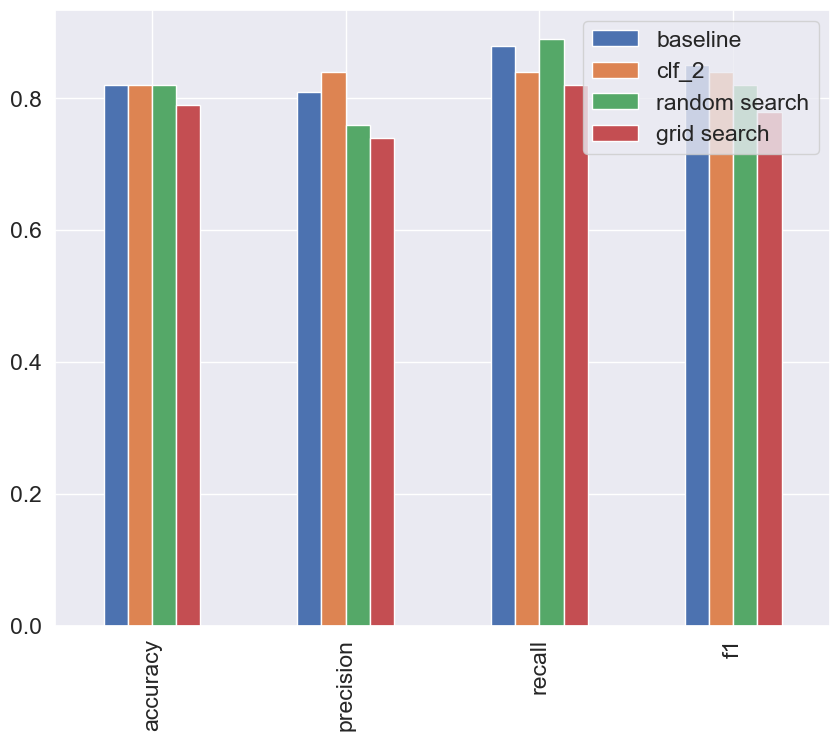

In [192]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## 6.Saving and loading trained machine learning models

Two ways to save and load model
1. With the python `pickle` module
2. With the `joblib` module

### Pickle

In [193]:
import pickle

#save a file or model to file
pickle.dump(gs_clf,open("gs_clf_random_model_1.pkl","wb"))

In [195]:
#load a saved model
loaded_pickle_model = pickle.load(open("gs_clf_random_model_1.pkl","rb"))

In [196]:
#make some random predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Acc: 78.69%
precision: 0.7419354838709677
recall: 0.8214285714285714
f1: 0.7796610169491526


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

### Joblib

In [197]:
from joblib import dump, load

#save the model to file
dump(gs_clf, filename="gs_clf_random_model_2.joblib")

['gs_clf_random_model_2.joblib']

In [199]:
#import a saved joblib model
loaded_joblib_model = load(filename="gs_clf_random_model_2.joblib")

In [200]:
#make random predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test,joblib_y_preds)

Acc: 78.69%
precision: 0.7419354838709677
recall: 0.8214285714285714
f1: 0.7796610169491526


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

# 7.Putting all together

In [201]:
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [202]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [204]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64